In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from joblib import load

In [16]:
# Load the saved model and scaler
model_path = "lstm_air_quality_model"
scaler_path = "scaler.joblib"
model = load_model(model_path)
scaler = load(scaler_path)

In [17]:
# Load the new dataset
data_path = "C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\Raw\\Test.csv"
new_data = pd.read_csv(data_path)

# Specify the features used by your model
features = ['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']

# Extract features from the new dataset
new_X = new_data[features].values

# Scale the features using the loaded scaler
new_X_scaled = scaler.transform(new_X)

# Reshape the scaled features to match the model input shape
new_X_scaled = new_X_scaled.reshape((new_X_scaled.shape[0], 1, new_X_scaled.shape[1]))

# Predict PM2.5 values using the model
predictions = model.predict(new_X_scaled).flatten()

# Optionally, add predictions to the new_data DataFrame and save or display them
new_data['Predicted PM2.5 (ug/m3)'] = predictions

# Display the first few rows to verify
print(new_data.head())

# If you want to save the predictions back to a CSV file
new_data.to_csv("C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\Predicted Data\\predicted_data.csv", index=False)


152/152 [==============================] - 1s 1ms/step
    From Date  PM2.5 (ug/m3)  PM10 (ug/m3)  NO (ug/m3)  NO2 (ug/m3)  \
0  01-01-2010      84.712513     44.386992    1.282917    16.843257   
1  02-01-2010      62.319811     44.386992    2.407083    25.068777   
2  03-01-2010      65.268720     44.386992    2.271667    21.477234   
3  04-01-2010      84.712513     44.386992    1.221667    16.660271   
4  05-01-2010      78.346784     44.386992    1.689583    21.737846   

   NOx (ppb)  NH3 (ug/m3)  SO2 (ug/m3)  CO (mg/m3)  Ozone (ug/m3)  \
0   6.958014    40.314006     6.393137    2.461931      31.398750   
1  22.724382    64.319861    10.920808    2.466351      49.344271   
2  19.850972    22.983593    12.486806    1.423326      74.097708   
3   6.960682    28.141680    10.686067    2.250312      31.398750   
4  11.765348    34.951989     9.328266    2.667428      39.175208   

   Temp (degree C)     RH (%)  WS (m/s)    WD (deg)  SR (W/mt2)    BP (mmHg)  \
0        31.059722  53.

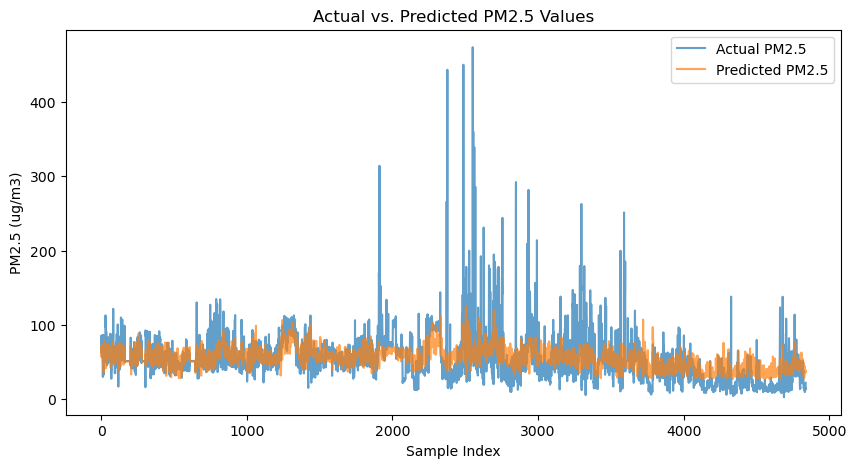

In [18]:
# Actual vs. Predicted PM2.5 Plot
plt.figure(figsize=(10, 5))
plt.plot(new_data['PM2.5 (ug/m3)'], label='Actual PM2.5', alpha=0.7)  # Adjust this if actual column name is different
plt.plot(new_data['Predicted PM2.5 (ug/m3)'], label='Predicted PM2.5', alpha=0.7)
plt.title('Actual vs. Predicted PM2.5 Values')
plt.xlabel('Sample Index')
plt.ylabel('PM2.5 (ug/m3)')
plt.legend()
plt.show()


Epoch 1/100
97/97 [==============================] - 3s 7ms/step - loss: 3713.2307 - val_loss: 2734.7700
Epoch 2/100
97/97 [==============================] - 0s 3ms/step - loss: 1889.1355 - val_loss: 1383.8645
Epoch 3/100
97/97 [==============================] - 0s 3ms/step - loss: 1362.0197 - val_loss: 1162.5262
Epoch 4/100
97/97 [==============================] - 0s 3ms/step - loss: 1181.7074 - val_loss: 1023.2050
Epoch 5/100
97/97 [==============================] - 0s 3ms/step - loss: 1068.4978 - val_loss: 947.3597
Epoch 6/100
97/97 [==============================] - 0s 3ms/step - loss: 1023.2576 - val_loss: 905.1063
Epoch 7/100
97/97 [==============================] - 0s 3ms/step - loss: 999.4222 - val_loss: 879.3265
Epoch 8/100
97/97 [==============================] - 0s 3ms/step - loss: 966.0747 - val_loss: 872.5120
Epoch 9/100
97/97 [==============================] - 0s 3ms/step - loss: 965.4626 - val_loss: 858.8375
Epoch 10/100
97/97 [==============================] - 0s 3ms/st

INFO:tensorflow:Assets written to: lstm_air_quality_model\assets


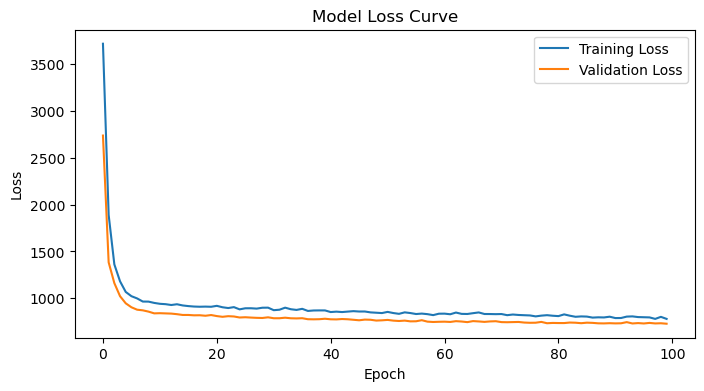

In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from joblib import dump

# Load dataset
data_path = "C:\\Users\\arock\\Downloads\\DOP\\DOP\\Work\\Cleaneddataset\\Raw\\Test.csv"
data = pd.read_csv(data_path)

# Define features and target
features = ['Temp (degree C)', 'RH (%)', 'WS (m/s)', 'WD (deg)', 'SR (W/mt2)', 'BP (mmHg)']
target = 'PM2.5 (ug/m3)'  # Adjust if necessary
X = data[features].values
y = data[target].values

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Model definition
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')

# Train the model and save the history
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

# Save the model and scaler for future use
model.save("lstm_air_quality_model")
dump(scaler, "scaler.joblib")

# Plotting the loss curve
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
